In [2]:
import json
# Create a list of questions and save it as a JSON lines file.
questions = [
    "Are there any sessions specifically focused on green technology or sustainability?",
    "Can you recommend any workshops on artificial intelligence or digital technology?",
    "Which sessions involve hands-on experiences or interactive activities?",
    "Are there any networking events scheduled for today? Where and when do they take place?",
    "Is there a session on the future of education? I am interested in learning about new educational technologies.",
    "What are today's sessions on startup investment strategies, and where are they located?",
    "Can you direct me to any discussions on the future of democracy or civic tech innovations?",
    "Where can I participate in discussions about the future of food and agriculture technologies?",
    "Are there any expert panels on the impact of technology in urban planning?",
    "Which sessions today focus on climate change and what are their locations?",
    "How can I join the session on ocean technology and marine conservation?",
    "What innovative health tech solutions are being discussed today?",
    "Is there a workshop on the integration of blockchain in traditional industries?",
    "Can I find out more about the cultural impact of technology in today's talks?",
    "Where are the sessions that focus on women in tech and diversity in the startup ecosystem?",
    "Are there any panels discussing ethical issues in AI development?",
    "Can I find workshops that offer practical advice on securing funding for green startups?",
    "What interactive exhibits focus on the latest advancements in renewable energy?",
    "Where can I join discussions about the role of technology in enhancing public services?",
    "Is there a session exploring the intersection of technology and art?",
    "What are the key topics for today's discussions on digital transformation in traditional industries?",
    "How can I participate in a workshop on data privacy and security in the digital age?",
    "Are there any sessions today that explore the use of AI in healthcare?",
    "Which events today focus on fostering inclusivity in tech environments?",
    "Where can I find discussions on the impact of digital technologies on rural development?",
    "What sessions today are focused on the practical applications of blockchain beyond cryptocurrency?",
    "Can you recommend any talks on the advancements in smart cities technologies?",
    "Where are the discussions on sustainable transportation technologies taking place?",
    "Which sessions will cover the latest trends in e-commerce and digital marketing?",
    "Are there any expert talks on how to leverage IoT for business efficiency?",
    "Are there any sessions focused on green technology or sustainability this Thursday before 14:00?",
    "Can you recommend any workshops on artificial intelligence or digital technology scheduled for Friday after 14:00?",
    "Which sessions involve hands-on experiences or interactive activities on Thursday afternoon?",
    "Are there any networking events happening today after 15:00? Where and when do they take place?",
    "Is there a session on the future of education scheduled for Friday morning? I am interested in learning about new educational technologies.",
    "What are today’s sessions on startup investment strategies, and where are they located? Are there more scheduled for Friday?",
    "Can you direct me to any discussions on the future of democracy or civic tech innovations happening this Thursday?",
    "Where can I participate in discussions about the future of food and agriculture technologies on Friday afternoon?",
    "Are there any expert panels on the impact of technology in urban planning scheduled for Thursday morning?",
    "Which sessions today focus on climate change and what are their locations? Are there similar sessions on Friday?",
    "How can I join the session on ocean technology and marine conservation this Friday before noon?",
    "What innovative health tech solutions are being discussed today, and are there more sessions on Friday?",
    "Is there a workshop on the integration of blockchain in traditional industries happening on Thursday after 14:00?",
    "Can I find out more about the cultural impact of technology in today’s talks or in any sessions scheduled for Friday morning?",
    "Where are the sessions that focus on women in tech and diversity in the startup ecosystem scheduled for today or Thursday?",
    "Are there any panels discussing ethical issues in AI development this Friday afternoon?",
    "Can I find workshops that offer practical advice on securing funding for green startups this Thursday morning?",
    "What interactive exhibits focus on the latest advancements in renewable energy happening today or Friday?",
    "Where can I join discussions about the role of technology in enhancing public services on Thursday after 16:00?",
    "Is there a session exploring the intersection of technology and art scheduled for Friday morning?",
    "What are the key topics for today's discussions on digital transformation in traditional industries, and are there any on Thursday?",
    "How can I participate in a workshop on data privacy and security in the digital age scheduled for this Friday after 15:00?",
    "Are there any sessions today that explore the use of AI in healthcare? Will there be more on Thursday afternoon?",
    "Which events today focus on fostering inclusivity in tech environments, and are there additional sessions on Friday?",
    "Where can I find discussions on the impact of digital technologies on rural development this Thursday before 14:00?",
    "What sessions today are focused on the practical applications of blockchain beyond cryptocurrency, and are there any on Friday?",
    "Can you recommend any talks on the advancements in smart cities technologies scheduled for Thursday afternoon?",
    "Where are the discussions on sustainable transportation technologies taking place today or Friday morning?",
    "Which sessions will cover the latest trends in e-commerce and digital marketing on Thursday?",
    "Are there any expert talks on how to leverage IoT for business efficiency scheduled for Friday afternoon?"
    
]

# Saving the questions to a JSON lines file
file_path = "Waterkant_Festival_Questions.jsonl"

# Writing to file
with open(file_path, "w") as file:
    for question in questions:
        file.write(f"{json.dumps({'question': question})}\n")

In [4]:
import numpy as np

np_embeddings = np.load('../prep/embeddings.npy')

In [5]:
import numpy as np

def find_k_nearest_neighbors(matrix, vec, k):
    """Find the k nearest neighbors in the matrix to the vector vec using cosine similarity.
       Returns both the indices of the nearest neighbors and their cosine similarities."""
    # Normalize the input vector and the matrix for cosine similarity
    vec_norm = vec / np.linalg.norm(vec)
    matrix_norm = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)

    # Compute cosine similarities using matrix multiplication (dot product)
    similarities = np.dot(matrix_norm, vec_norm)

    # Get the indices of the top k similarities using argsort and negative slicing for efficiency
    k_nearest_indices = np.argsort(-similarities)[:k]

    # Get the top k similarities
    k_nearest_distances = similarities[k_nearest_indices]

    return k_nearest_indices, k_nearest_distances

In [6]:
from dotenv import load_dotenv

load_dotenv()  # This loads the environment variables from .env

True

In [7]:
from openai import OpenAI
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [8]:
class Document:
    def __init__(self, content, metadata=None, doc_id=None, num_chunks=None):
        self.content = content
        self.metadata = metadata if metadata is not None else {}
        self.id = doc_id if doc_id is not None else str(uuid.uuid4())
        self.num_chunks = num_chunks

    def add_metadata(self, key, value):
        """
        Adds a key-value pair to the document's metadata.

        :param key: The key for the metadata item.
        :param value: The value for the metadata item.
        """
        self.metadata[key] = value

    def __str__(self):
        """
        Returns a string representation of the document.

        :return: A string containing the content and metadata of the document.
        """
        return f"Content: {self.content}\nMetadata: {self.metadata}"


    def to_json(self):
        """ Convert the Document object to a JSON string """
        # Use a dictionary comprehension to handle the renaming of 'id' to 'doc_id'
        data = {k if k != 'id' else 'doc_id': v for k, v in self.__dict__.items()}
        return json.dumps(data)

    @classmethod
    def from_json(cls, json_str):
        """ Create a Document object from a JSON string """
        data = json.loads(json_str)
        return cls(**data)


In [9]:
import json
import uuid
with open('../prep/documents.json', 'r') as file:
            json_documents = json.load(file)

loaded_documents = [Document.from_json(json_str) for json_str in json_documents]

In [11]:
question_embeddings = []
for question in questions:
    question_embedding = get_embedding(question)
    question_embeddings.append(question_embedding)

In [13]:
np_question_embeddings = [np.array(question_embedding) for question_embedding in question_embeddings]

In [15]:
k = np_embeddings.shape[0]

In [16]:
k

112

In [27]:
indices, similarities = find_k_nearest_neighbors(np_embeddings, np_question_embeddings[-1], k)

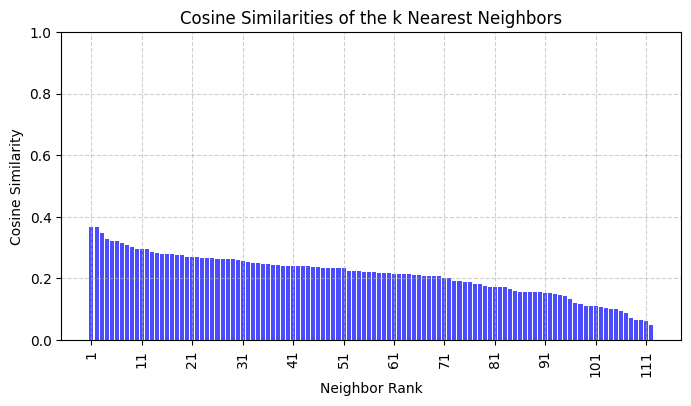

In [28]:
import matplotlib.pyplot as plt
# Plotting the distances
plt.figure(figsize=(8, 4))
plt.bar(range(k), similarities, color='blue', alpha=0.7)
plt.title('Cosine Similarities of the k Nearest Neighbors')
plt.xlabel('Neighbor Rank')
plt.ylabel('Cosine Similarity')
plt.xticks(np.arange(0, k, step=10), [f"{i+1}" for i in range(0, k, 10)])  # Label every 10th point
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.ylim([0, 1])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
for i, indice in enumerate(indices):
    print(loaded_documents[indice])
    print(f"Similarity: {similarities[i]}\n\n")

Content: Titel: How to position and market internationally – Lessons from Denmark, Germany & Kenya
Beschreibung: I will try to give more insides into how to establish and grow a startup on a global market, using my experience from the different countries I worked in. My session is going to be a workshop, where everyone will get small tasks and get the chance to interact with the whole group. I am looking forward to interacting with startups and entrepreneurs, who have an interest in going global and making the world their market!
Datum: Friday June 16, 2023 16:00 - 16:45 CEST
Ort: Waterside Tent
Metadata: {'speakers': [{'name': 'Benjamin Huss', 'role': 'Founder', 'organization': 'Huss Group', 'description': 'Since 2014, Benjamin has focused on fostering and investing in innovative Danish start-ups. He is particularly interested in the initial generation of business and identifying pathways to economic success. After investigating the current resources available to help emerging busines